In [1]:
import pandas as pd                                                                     # data manipulation and analysis
import numpy as np                                                                      # working with arrays
import seaborn as sns                                                                   # statistical graphs
import matplotlib.pyplot as plt                                                         # data visualization and graphical plotting library  
%matplotlib inline
import warnings                                                                         # suppress warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier                                     # combines the output of multiple decision tress to reach a single result  
from sklearn.model_selection import train_test_split                                    # split arrays or matrices into random train and test subsets.
from sklearn.model_selection import cross_val_score                                     # train and tests a model over multiple folds of the dataset                                      
from sklearn.metrics import confusion_matrix                                            # evaluate the performance of a classification model
from sklearn.metrics import accuracy_score                                              # set of labels predicted must match the corresponding set of labels in y_true
from sklearn.metrics import classification_report                                       # measure the quality of predictions from a class
from xgboost import XGBClassifier                                                       # provides parallel tree boosting
from sklearn.ensemble import GradientBoostingClassifier                                 # provides gradient boosting
from copulas.multivariate import GaussianMultivariate                                   # models the data using the Gaussian multivariate function
from copulas.visualization import compare_2d                                            # visualizing real and synthetic data

In [2]:
breast_cancer_DF = pd.read_excel('../Data_Preprocesssing/Data_Preprocessing.xlsx',sheet_name='wdbc')

In [3]:
breast_cancer_DF.shape

(569, 32)

In [4]:
breast_cancer_DF.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothnes1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothnes3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
breast_cancer_DF.describe()

,ID,radius1,texture1,perimeter1,area1,smoothnes1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothnes3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
breast_cancer_DF.isnull()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothnes1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothnes3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
breast_cancer_DF.isnull().sum()

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothnes1            0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothnes2            0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothnes3            0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [8]:
breast_cancer_DF['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [9]:
# checking and comparing the different diagnosis
breast_cancer_DF['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

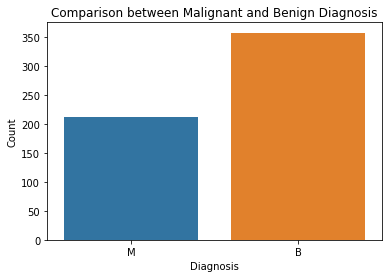

In [10]:
# graph using seaborn
sns.countplot(x=breast_cancer_DF["Diagnosis"])
plt.title("Comparison between Malignant and Benign Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

In [11]:
# We created a dataset that takes in all other variables except the the ID number and Diagnosis
X = breast_cancer_DF.drop(['ID','Diagnosis'],axis=1) # for the x value, we will omit the ID and Diagnosis
code = {'B': 0, 'M': 1}
Y = breast_cancer_DF['Diagnosis'].replace(code).values # for the y value, we only want the Diagnosis

In [12]:
# create the model to train the data 
# for the random state, it could be any number, playing around with this can change the outcome
X_train, X_test, Y_train, y_test = train_test_split(X,Y,random_state=99)

In [13]:
# import the random forest classifier
# gini = index ranges from 0-1. computes the degree of probability of a specific varaible that is wrongly being classified when chosen randomly
clf = RandomForestClassifier(criterion="gini",max_depth=8,min_samples_split=10,random_state=6)

In [14]:
# fit the data of x and y train
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=6)

In [15]:
# computed as the mean and standard deviation of accumulation of the impurity decrease within each tree
clf.feature_importances_

array([0.04756914, 0.01038781, 0.05063505, 0.06861194, 0.0033205 ,
       0.01340563, 0.06352814, 0.08490136, 0.0022988 , 0.00248689,
       0.01418071, 0.00133052, 0.02069661, 0.03254582, 0.00270483,
       0.004248  , 0.00246741, 0.00719317, 0.00337709, 0.00466282,
       0.09890596, 0.0134518 , 0.1284849 , 0.08529694, 0.0099211 ,
       0.01406674, 0.02702326, 0.16958017, 0.00923672, 0.00348019])

In [16]:
# display the columns to match up with the important features
breast_cancer_DF.columns

Index(['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothnes1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothnes2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothnes3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [17]:
# make predictions for the y variable
y_pred = clf.predict(X_test)

In [18]:
# output the predictions
print(y_pred)

[0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0
 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]


In [19]:
# measure the performance of the classification model
confusion_matrix(y_test,y_pred)

array([[99,  0],
       [ 6, 38]], dtype=int64)

In [20]:
# testing the accuracy of our classification model
accuracy_clf = np.round(accuracy_score(y_test, y_pred)*100.0, 2)
accuracy_clf

95.8

In [21]:
# cross checking with cross-validation
# this will check the accuracy up the total amount of cv
cross_val_score(clf,X_train,Y_train,cv = 10)

array([1.        , 0.93023256, 0.97674419, 0.97674419, 0.97674419,
       0.88372093, 0.92857143, 0.97619048, 0.95238095, 0.92857143])

In [22]:
# classification report to give a summary of our model
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.86      1.00      0.93        38

    accuracy                           0.96       143
   macro avg       0.93      0.97      0.95       143
weighted avg       0.96      0.96      0.96       143



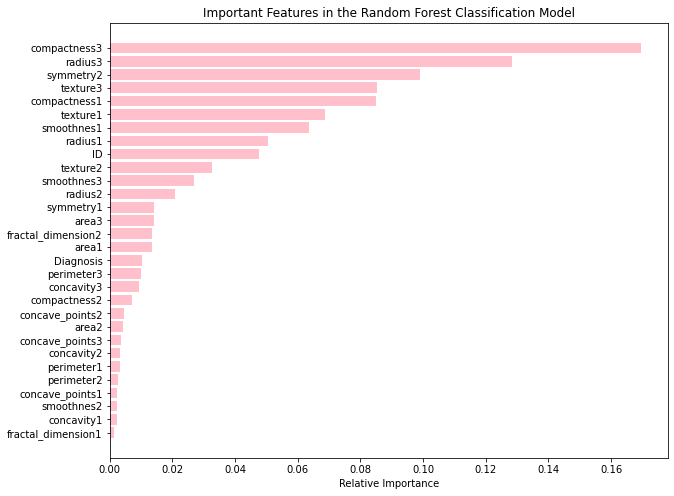

In [23]:
# create a graph showcasing which features are most relative in determining the diagnosis
features = breast_cancer_DF.columns
importance = clf.feature_importances_
indicies = np.argsort(importance)

# great graph labels
plt.rc('figure', figsize=(10, 8)) # resizing the graph for better visualization - this will apply to all graphs
plt.title("Important Features in the Random Forest Classification Model")
plt.xlabel("Relative Importance")
plt.barh(range(len(indicies)), importance[indicies],color = 'pink', align = 'center')
plt.yticks(range(len(indicies)), [features[x] for x in indicies])

plt.show()

In [24]:
# Fitting XGBoost Classifier model
XGB = XGBClassifier()
XGB.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [25]:
# computed as the mean and standard deviation of accumulation of the impurity decrease within each tree
XGB.feature_importances_

array([0.01291502, 0.02221479, 0.00334115, 0.1753301 , 0.00995358,
       0.01057219, 0.00878057, 0.03885   , 0.00173686, 0.        ,
       0.01034152, 0.        , 0.        , 0.02135361, 0.01404253,
       0.00686897, 0.00259415, 0.0037085 , 0.00279399, 0.00720163,
       0.        , 0.01517035, 0.20919164, 0.01834159, 0.01000057,
       0.00553103, 0.02473211, 0.34525022, 0.00225577, 0.01692757],
      dtype=float32)

In [26]:
# make predictions for test data
y_pred = XGB.predict(X_test)

# output the predictions
print(y_pred)

[0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0
 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]


In [27]:
# evaluate predictions
accuracy_XGB = np.round(accuracy_score(y_test, y_pred)*100.0, 2)
accuracy_XGB

97.9

In [28]:
# measure the performance of the classification model
confusion_matrix(y_test,y_pred)

array([[99,  0],
       [ 3, 41]], dtype=int64)

In [29]:
# cross checking with cross-validation
# this will check the accuracy up the total amount of cv
cross_val_score(XGB,X_train,Y_train,cv = 10)

array([1.        , 0.95348837, 0.97674419, 0.95348837, 0.95348837,
       0.90697674, 0.95238095, 0.95238095, 0.95238095, 0.95238095])

In [30]:
# classification report to give a summary of our model
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       102
           1       0.93      1.00      0.96        41

    accuracy                           0.98       143
   macro avg       0.97      0.99      0.97       143
weighted avg       0.98      0.98      0.98       143



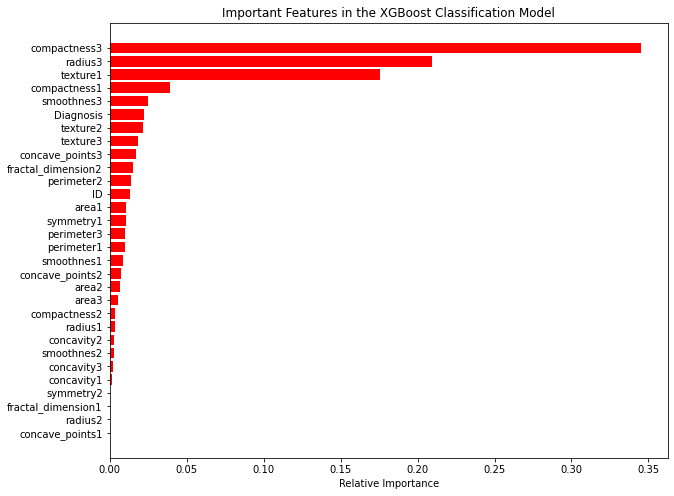

In [31]:
# create a graph showcasing which features are most relative in determining the diagnosis
features = breast_cancer_DF.columns
importance = XGB.feature_importances_
indicies = np.argsort(importance)

# great graph labels
plt.rc('figure', figsize=(10, 8)) # resizing the graph for better visualization - this will apply to all graphs
plt.title("Important Features in the XGBoost Classification Model")
plt.xlabel("Relative Importance")
plt.barh(range(len(indicies)), importance[indicies],color = 'red', align = 'center')
plt.yticks(range(len(indicies)), [features[x] for x in indicies])

plt.show()

In [32]:
# fit the GBM model on the whole dataset
GBM = GradientBoostingClassifier()
GBM.fit(X, Y)

GradientBoostingClassifier()

In [33]:
# computed as the mean and standard deviation of accumulation of the impurity decrease within each tree
GBM.feature_importances_

array([5.54342669e-05, 2.71986690e-02, 6.15404805e-04, 1.12367305e-03,
       1.92080884e-05, 1.78378426e-03, 9.49938419e-05, 1.34255214e-01,
       1.77917889e-03, 3.56864728e-05, 5.47021538e-03, 4.01523251e-03,
       3.69734291e-04, 8.29813804e-03, 9.26084343e-04, 2.75836237e-03,
       2.28415809e-03, 4.55858593e-03, 1.46343305e-03, 1.03757393e-03,
       4.41475736e-01, 3.66261204e-02, 1.51831251e-01, 2.87425066e-02,
       7.52617985e-03, 1.04200291e-03, 1.17389466e-02, 1.22409291e-01,
       1.40368831e-04, 3.24832079e-04])

In [34]:
# make predictions for test data
y_pred = GBM.predict(X_test)

# output the predictions
print(y_pred)

[0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0
 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0]


In [35]:
# evaluate predictions
accuracy_GBM = np.round(accuracy_score(y_test, y_pred)*100.0, 2)
accuracy_GBM

100.0

In [36]:
# measure the performance of the classification model
confusion_matrix(y_test,y_pred)

array([[99,  0],
       [ 0, 44]], dtype=int64)

In [37]:
# cross checking with cross-validation
# this will check the accuracy up the total amount of cv
cross_val_score(GBM,X_train,Y_train,cv = 10)

array([0.97674419, 0.95348837, 0.95348837, 0.95348837, 0.90697674,
       0.93023256, 0.92857143, 0.97619048, 0.97619048, 0.9047619 ])

In [38]:
# classification report to give a summary of our model
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        44

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



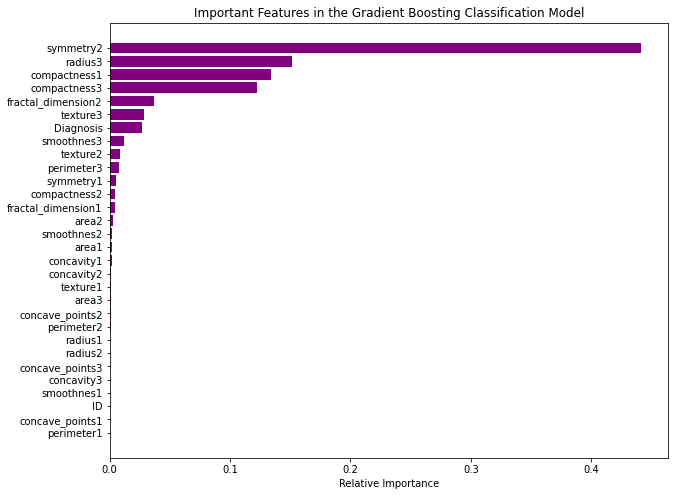

In [39]:
# create a graph showcasing which features are most relative in determining the diagnosis
features = breast_cancer_DF.columns
importance = GBM.feature_importances_
indicies = np.argsort(importance)

# great graph labels
plt.rc('figure', figsize=(10, 8)) # resizing the graph for better visualization - this will apply to all graphs
plt.title("Important Features in the Gradient Boosting Classification Model")
plt.xlabel("Relative Importance")
plt.barh(range(len(indicies)), importance[indicies],color = 'purple', align = 'center')
plt.yticks(range(len(indicies)), [features[x] for x in indicies])

plt.show()

# Analysis and Conclusion

In [40]:
# split the data into train and test sets
X_train_cop, X_test_cop, Y_train_cop, y_test_cop = train_test_split(X, Y, random_state=99)

In [41]:
# Random Forest
model = clf.fit(X_train_cop, Y_train_cop)
pred = clf.predict(X_test_cop)
accuracy_cop_clf = np.round(accuracy_score(y_test_cop, pred)*100.0, 2)
accuracy_cop_clf

95.8

In [42]:
# XGBoost
model = XGB.fit(X_train_cop, Y_train_cop)
pred = XGB.predict(X_test_cop)
accuracy_cop_XGB = np.round(accuracy_score(y_test, pred)*100.0, 2)
accuracy_cop_XGB

97.9

In [43]:
# GBM
model = GBM.fit(X_train_cop, Y_train_cop)
pred = GBM.predict(X_test_cop)
accuracy_cop_GBM = np.round(accuracy_score(y_test, y_pred)*100.0, 2)
accuracy_cop_GBM

100.0

In [44]:
# comparing the three model accuracies
# setting up our results dataframe
data = {'Classifier': ['RandomForestClassifier', 'XGBClassifier', 'GradientBoostingClassifier'],
        'Accuracy': [accuracy_clf, accuracy_XGB, accuracy_GBM]}

results = pd.DataFrame(data)
results

,Classifier,Accuracy
0,RandomForestClassifier,95.8
1,XGBClassifier,97.9
2,GradientBoostingClassifier,100.0


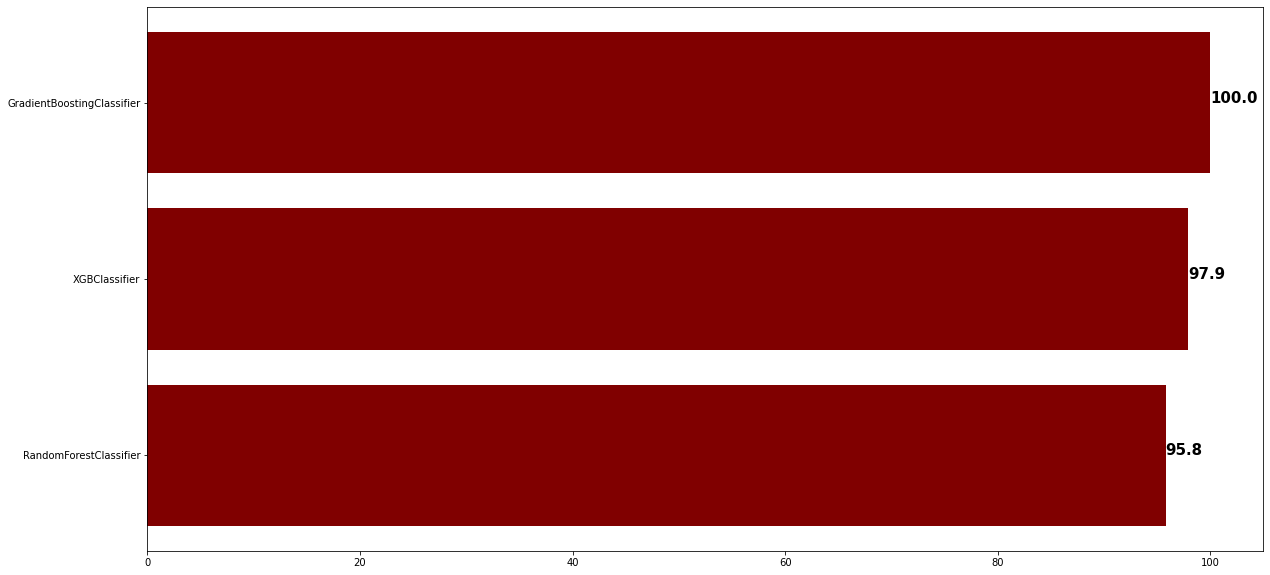

In [45]:
# creating the bar plot
fig = plt.figure(figsize = (20, 10))
x = results['Classifier']
y = results['Accuracy']
title_font = {'weight': 'bold', 'size': 15}
plt.barh(x, y, color = 'maroon')
 
for index, value in enumerate(y):
    plt.text(value, index, str(value), **title_font)
 
plt.show()

The gradient boosting classifier model is the most accurate classifier model of the three.